
<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Random Forests and ExtraTrees Lab


_Instructor: Husain Amer_

---

## Import libraries
---

We'll need the following libraries for today's lecture:
- `pandas`
- `numpy`
- `GridSearchCV`, `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module 
- `RandomForestClassifier` and `ExtraTreesClassifier` from `sklearn`'s `ensemble` module 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

# To ignore unwanted warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data
---

Load titanic `train.csv` and `test.csv` from Kaggle into `DataFrames`.

In [2]:
train = pd.read_csv('./datasets/train.csv')

In [3]:
test = pd.read_csv('./datasets/test.csv')

## How many entries are missing in train and test datasets?

In [4]:
# CODE HERE PLEASE
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# NO CODE HERE PLEASE

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# CODE HERE PLEASE
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# NO CODE HERE PLEASE

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* In train: `Age`, `Cabin` and `Embarked`
* In test: `Age`, `Fare` and `Cabin`

**Create these heatmaps, yellow are the missing data**. `Hint: cmap='viridis'`

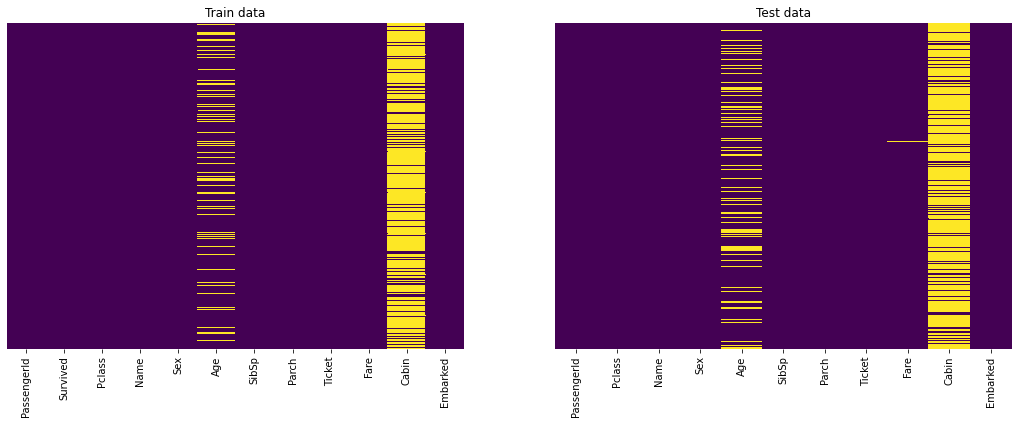

In [6]:
# CODE HERE PLEASE
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

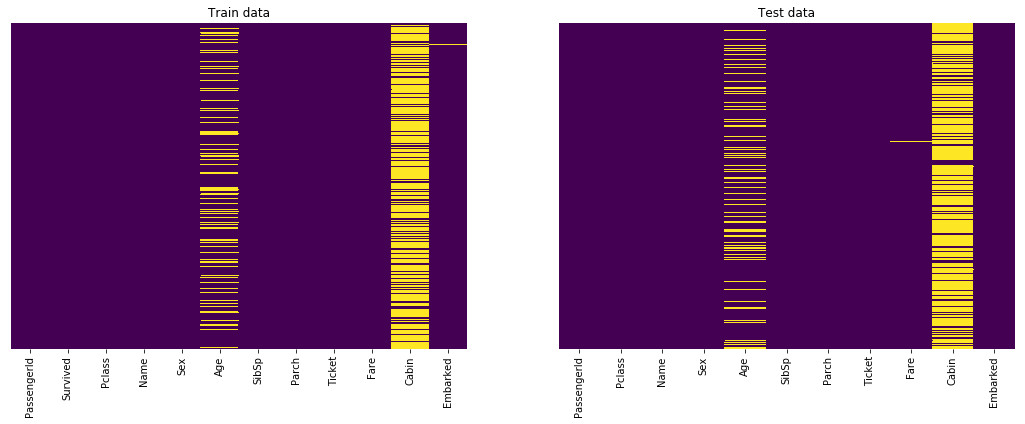

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

## Data Cleaning: 

**How many ports are in Embarked column?(train data)**

In [7]:
# CODE HERE PLEASE
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# NO CODE HERE PLEASE

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Well, we can drop the two rows with missing `Embarked` values in train, however, let's fill them with the port of highest embarkation.**

In [8]:
# CODE HERE PLEASE
train.Embarked.fillna('S',inplace=True)
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
# NO CODE HERE PLEASE

In [14]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**What is the shape of your dataset (train).** 

In [9]:
# CODE HERE PLEASE
train.shape

(891, 12)

In [16]:
# NO CODE HERE PLEASE

(891, 12)

**(test data) What is the `Pclass` of missing fare in test dataset. Print the complete row here.**

In [10]:
# CODE HERE PLEASE
test[test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


`Pclass` is 3.

In [18]:
# NO CODE HERE PLEASE

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


**(test data) Compute the average of `Fare` of the missing `Pclass` (you should be able to identify this from above question).**

In [11]:
# CODE HERE PLEASE
avg_plcass3 = test[(test.Pclass == 3)].Fare.mean()
print('The mean fare for the Pclass (for missing fare data) is:',avg_plcass3)

The mean fare for the Pclass (for missing fare data) is: 12.459677880184334


In [20]:
# NO CODE HERE PLEASE

The mean fare for the Pclass (for missing fare data) is:  13.675550101832997


**(test data) Now you got the mean fare, please fill the missing value of `Fare` with everyone from the same `Pclass`, the mean you have computed above.**

In [12]:
# CODE HERE PLEASE
test.Fare.fillna(avg_plcass3,inplace=True)

In [22]:
# NO CODE HERE PLEASE

**(test data) How the columns look like now?**

In [13]:
# CODE HERE PLEASE
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [24]:
# NO CODE HERE PLEASE

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### Let's see how to teat the `Age` column!

**What is the mean age of each Pclass in the train data.**

In [14]:
# CODE HERE PLEASE
train.groupby('Pclass').Age.mean().to_frame()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [26]:
# NO CODE HERE PLEASE

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


**Write a function `impute_age` to fill the mean age with respect to each `Pclass`.**<br>
*I left this code for you guys, please try to understand.*

In [15]:
# CODE HERE PLEASE

In [16]:
#defining a function 'impute_age'
def impute_age(age_pclass): # passing age_pclass as ['Age', 'Pclass']
    
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

**Use the above function to both of your datasets (train and test) and fill the missing data in `Age` column accordingly.**

In [17]:
# CODE HERE PLEASE
# (for train) grab age and apply the impute_age, our custom function 
train.Age = train.apply(lambda value: impute_age([value.Age,value.Pclass]),axis=1,result_type='expand')
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [32]:
# NO CODE HERE PLEASE

train part


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [18]:
# CODE HERE PLEASE
# (for test) grab age and apply the impute_age, our custom function
test.Age = test.apply(lambda value: impute_age([value.Age,value.Pclass]),axis=1,result_type='expand')
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [34]:
# NO CODE HERE PLEASE

test part


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### Looks good now! The only column is `Cabin`. Let's do some Feature Engineering here 
There are quite a lot of missing data in `Cabin`. Let's this column.

Do this thing:
- If there originally was a value for `Cabin` -- put 1
- If the value is missing/null -- put 0

**Please do this for both `train` and `test`**<br>
HINT: `.astype()`

In [19]:
# CODE HERE PLEASE
train.Cabin.fillna(0,inplace=True)
train.Cabin = np.where(train.Cabin != 0, 1, train.Cabin)

In [20]:
# CODE HERE PLEASE
test.Cabin.fillna(0,inplace=True)
test.Cabin = np.where(test.Cabin != 0, 1, test.Cabin)

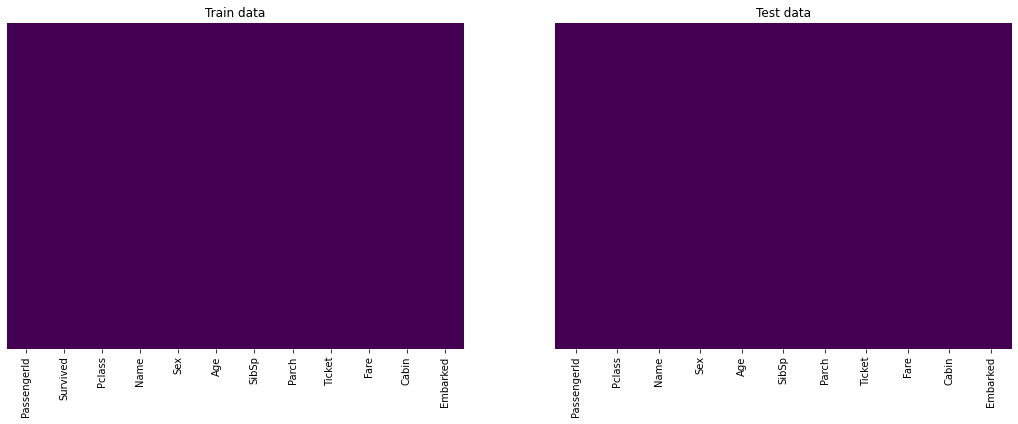

In [21]:
# CODE HERE PLEASE
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))

# train data 
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')

# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

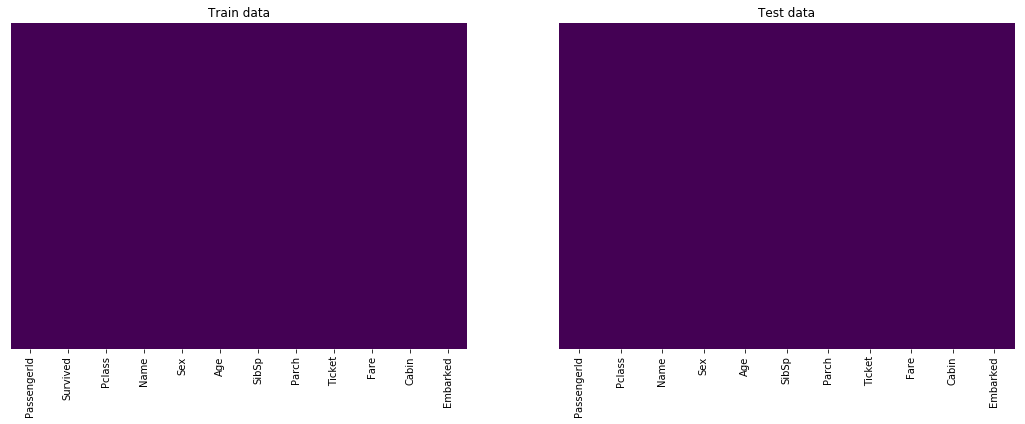

In [38]:
# NO CODE HERE PLEASE

### Excellent, looks all good. No more missing data!

### Dummies
**Dummy the `Sex` and `Embarked` columns. Be sure to set `drop_first=True`.**

In [23]:
# CODE HERE PLEASE
train1 = pd.get_dummies(train,columns=['Sex','Embarked'],drop_first=True)
test1 = pd.get_dummies(test,columns=['Sex','Embarked'],drop_first=True)

In [40]:
#train = pd.get_dummies(train, columns=????????????????????)

In [41]:
# NO CODE HERE PLEASE

***Here, we are done with dummies, you can either use head, info to confirm the new columns, however, I am using heatmap again. Compare the difference between above and below heatmaps, do you see new columns after dummies?***

In [24]:
# CODE HERE PLEASE
train1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,1


In [25]:
test1.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,0,1


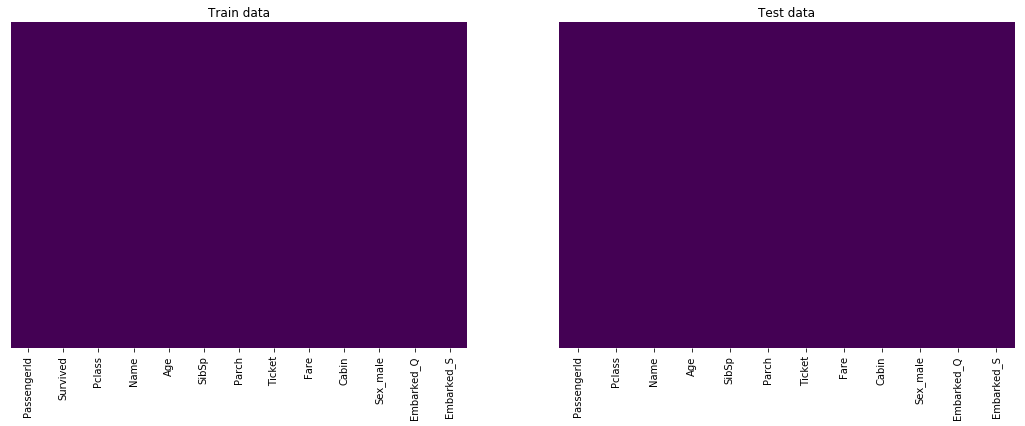

In [43]:
# NO CODE HERE PLEASE

## Model Prep: Create `X` and `y` variables
---

Our features will be:`[Pclass, Age, SibSp, Parch, Fare, Cabin, Sex_male, Embarked_Q, Embarked_S]`

And our target will be `Survived`

In [26]:
features_drop = ['PassengerId','Name', 'Ticket', 'Survived']

**(train data) Write a list comprehension to grab the selected features, I know you can simply pass the list of feature but you must write list comprehension here.**

In [27]:
# CODE HERE PLEASE
selected_features = [feature for feature in train1.columns if feature not in features_drop]
selected_features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

In [46]:
# list Comprehension
#selected_features = ????????????????????????
#selected_features
# NO CODE HERE PLEASE

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Sex_male',
 'Embarked_Q',
 'Embarked_S']

**(train data) Now, separate the selected_column in `X_train` and `Survived` in `y_train`.**

In [47]:
# CODE HERE PLEASE

In [48]:
X_train = train[selected_features]
y_train = train['Survived']

**(train data)What is our baseline accuracy?**<br>
The baseline accuracy is the percentage of the majority class, regardless of whether it is 1 or 0. It serves as the benchmark for our model to beat.

In [29]:
# CODE HERE PLEASE
y_train.value_counts()/len(y_train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [50]:
# NO CODE HERE PLEASE

0    0.616162
1    0.383838
Name: Survived, dtype: float64

## Model instantiation

**Create an instance of [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [`ExtraTreesClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html).**<br>
[DecisionTreeClassifier vs ExtraTreeClassifier](https://stackoverflow.com/questions/20177970/decisiontreeclassifier-vs-extratreeclassifier)<br>

Recall on random forests and extra-trees<br>
**A random forest classifier.**<br>
>A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if *bootstrap=True (default)*.

**An extra-trees classifier.**<br>
>This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.  - *bootstrap=False by default*

**A note on estimators:** <br>

>Random frosts is a robust algorithm, they have tendency to over-fit but as the number of trees increases this tendency decreases. However, after certain number of trees the performance tend to stay in a certain value. Increasing number of trees will have no effect however, it will add computation overhead, which is unnecessary.

In [30]:
# RF instance with 100 trees -- <see the documentation>
rf = RandomForestClassifier(n_estimators=100) # bootstrap=True by default #max_features='auto',

In [31]:
#ET instance witn 100 trees
et = ExtraTreesClassifier(n_estimators=100) # bootstrap=False by default #max_features='auto',

<font color='red'>*Just a quick note, in ExtraTrees, randomness does not come from bootstrapping of data, but rather comes from the random splits of all observations. However, we can use bootstrap to add extra randomness.*</font> 

**Fit both the instances on train data.**

In [32]:
# CODE HERE PLEASE
rf = rf.fit(X_train,y_train)

In [33]:
et = et.fit(X_train,y_train)

In [54]:
#rf = ???????????

In [55]:
#et = ???????????

**Let's evaluate the model on test data**<br>
Separate the test data into `X_test` and `y_test`. Use same features and target as above for the train data.

In [34]:
# CODE HERE PLEASE
X_test = test1[selected_features]
y_test = pd.read_csv('../datasets/gender_submission.csv')
y_test.drop('PassengerId',axis=1,inplace=True)

In [57]:
# NO CODE HERE PLEASE

**Get the predictions for both models in pred_rd and pred_et for test data now.** 

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# CODE HERE PLEASE
pred_rf = rf.predict(X_test)
pred_et = et.predict(X_test)

In [60]:
#pred_rf ??????????????????
#pred_et = ????????????????
# NO CODE HERE PLEASE

**Print confusion matrix and classification reports for both models.** 

In [53]:
# CODE HERE PLEASE
print('confusion matrix for RF')
print(confusion_matrix(y_test, pred_rf))

print('classification report for RF')
print(classification_report(y_test, pred_rf))

confusion matrix for RF
[[227  39]
 [ 41 111]]
classification report for RF
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       266
           1       0.74      0.73      0.74       152

    accuracy                           0.81       418
   macro avg       0.79      0.79      0.79       418
weighted avg       0.81      0.81      0.81       418



In [62]:
# NO CODE HERE PLEASE (Note: You may got different result here)

confusion matrix for RF
[[547   2]
 [ 11 331]]
classification report for RF
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.97      0.98       342

   micro avg       0.99      0.99      0.99       891
   macro avg       0.99      0.98      0.98       891
weighted avg       0.99      0.99      0.99       891



In [54]:
# CODE HERE PLEASE
print('confusion matrix for ET')
print(confusion_matrix(y_test, pred_et))

print('classification report for ET')
print(classification_report(y_test, pred_et))

confusion matrix for ET
[[221  45]
 [ 42 110]]
classification report for ET
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       266
           1       0.71      0.72      0.72       152

    accuracy                           0.79       418
   macro avg       0.77      0.78      0.78       418
weighted avg       0.79      0.79      0.79       418



In [64]:
# NO CODE HERE PLEASE (Note: You may got different result here)

confusion matrix for ET
[[547   2]
 [ 11 331]]
classification report for ET
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       0.99      0.97      0.98       342

   micro avg       0.99      0.99      0.99       891
   macro avg       0.99      0.98      0.98       891
weighted avg       0.99      0.99      0.99       891



# Next Part Below...!

Random Forests is a robust and state of the art Machine Learning algorithm. We may not need to do the GridSearch for them however, along with the no. of features in each bootstrapped sample, the depth of the tree could be an important parameter. They may needs to be optimized to avoid possible overfitting. <br>  
Let's try GridSearch on only on the `max_depth`, you can try other set os parameters as well and see how the things work.

## Grid Search for Random Forest
---

They're both pretty close performance-wise. **We could Grid Search over both**, but for the sake of time we'll go with `RandomForestClassifier`. <br>Try for the 2nd one yourself!

In [42]:
# our grid
rf_params = {
#    'n_estimators': [10, 50, 100, 150, 200, 250],
#    'max_features':[2, 3, 5, 7, 8],
    'max_depth': [1, 2, 3, 4, 5, 8],
#    'criterion':['gini', 'entropy'],
}

In [43]:
rf_g = RandomForestClassifier(n_estimators=100) # just a new instance!

**Run the GridSearch with CV = 5.**

In [67]:
# CODE HERE PLEASE

In [44]:
gs = GridSearchCV(rf_g, param_grid=rf_params, cv=5, verbose = 1)
#shift+tab should be your punch pad now, right?
gs.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   10.1s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 8]}, verbose=1)

In [69]:
# NO CODE HERE PLEASE (Note: You may got different result here)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

**What is the best score now on train data set?**

In [45]:
# CODE HERE PLEASE
gs.best_score_

0.8215742891218379

In [71]:
# NO CODE HERE PLEASE (Note: You may got different result here)

0.8181818181818182


**What is the score of your trained model after GridSearch on train data.**

In [46]:
# CODE HERE PLEASE
gs.score(X_train,y_train)

0.9180695847362514

In [73]:
# NO CODE HERE PLEASE (Note: You may got different result here)

0.9191919191919192

**How to get the best parameters.**

In [47]:
# CODE HERE PLEASE
gs.best_params_

{'max_depth': 8}

In [75]:
# NO CODE HERE PLEASE (Note: You may got different result here)

{'max_depth': 8}

**What is your best model after gridsearch?**

In [49]:
# CODE HERE PLEASE
rf_best = gs.best_estimator_
rf_best

RandomForestClassifier(max_depth=8)

In [77]:
#rf_bset=????????????
#rf_bset
# NO CODE HERE PLEASE (Note: You may got different result here)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Fit train data using best model.**

In [50]:
# CODE HERE PLEASE
rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=8)

In [79]:
# NO CODE HERE PLEASE

**Get prediction for the best model in pred_rf_best.**

In [51]:
# CODE HERE PLEASE
pred_rf_best = rf_best.predict(X_test)

In [52]:
# NO CODE HERE PLEASE
print('confusion matrix for RF')
print(confusion_matrix(y_test, pred_rf_best))

print('classification report for RF')
print(classification_report(y_test, pred_rf_best))

confusion matrix for RF
[[241  25]
 [ 40 112]]
classification report for RF
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       266
           1       0.82      0.74      0.78       152

    accuracy                           0.84       418
   macro avg       0.84      0.82      0.83       418
weighted avg       0.84      0.84      0.84       418



**Print confusion matrix and classification report.**

In [82]:
# CODE HERE PLEASE

In [83]:
print('confusion matrix for RF')
print(confusion_matrix(y_test, pred_rf_best))

print('classification report for RF')
print(classification_report(y_test, pred_rf_best))

confusion matrix for RF
[[532  17]
 [ 63 279]]
classification report for RF
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       549
           1       0.94      0.82      0.87       342

   micro avg       0.91      0.91      0.91       891
   macro avg       0.92      0.89      0.90       891
weighted avg       0.91      0.91      0.91       891

